In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train = pd.read_csv('/content/Corona_NLP_train.csv', encoding='ISO-8859-1')
test = pd.read_csv('/content/Corona_NLP_test.csv', encoding='ISO-8859-1')

print("Training Data:")
print(train.head())

X_train_text = train['OriginalTweet']  # The tweet text to be used as a feature
y_train = train['Sentiment']           # Target variable - sentiment

X_test_text = test['OriginalTweet']    # The tweet text for testing
y_test = test['Sentiment']             # Target variable for testing

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train = vectorizer.fit_transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()
mlp_ann = MLPClassifier(random_state=42, max_iter=300)

# Train the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
mlp_ann.fit(X_train, y_train)

# Make predictions
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
nb_predictions = naive_bayes.predict(X_test)
mlp_predictions = mlp_ann.predict(X_test)

# Calculate metrics
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate each model
dt_metrics = evaluate_model(y_test, dt_predictions)
rf_metrics = evaluate_model(y_test, rf_predictions)
nb_metrics = evaluate_model(y_test, nb_predictions)
mlp_metrics = evaluate_model(y_test, mlp_predictions)

# Display the results
print(f"Decision Tree Metrics: {dt_metrics}")
print(f"Random Forest Metrics: {rf_metrics}")
print(f"Naive Bayes Metrics: {nb_metrics}")
print(f"Multilayer Perceptron Metrics: {mlp_metrics}")


Training Data:
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  
Decision Tree Metrics: (0.3767772511848341, 0.3762531432600126, 0.3767772511848341, 0.3760775696576332)
Random Forest Metrics: (0.4689310163243813, 0.4766964614336579, 0.4689310163243813, 0.4684831343673244)
Naive Bayes Metrics: (0.37

Training Data:
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  
Training Decision Tree...

Classification Report for Decision Tree:

                    precision    recall  f1-score   support

Extremely Negative       0.37      0.37      0.37       592
Extremely Positive       0.42      0.40     

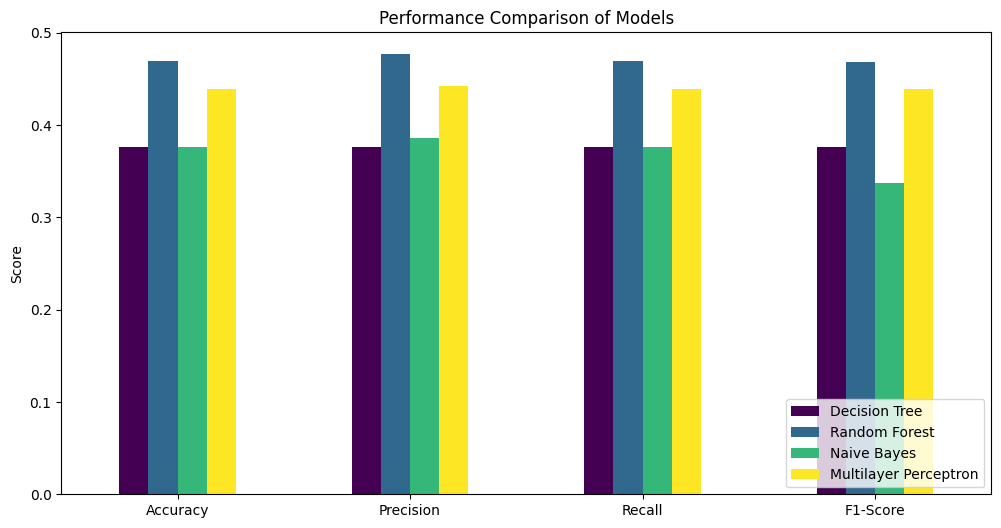

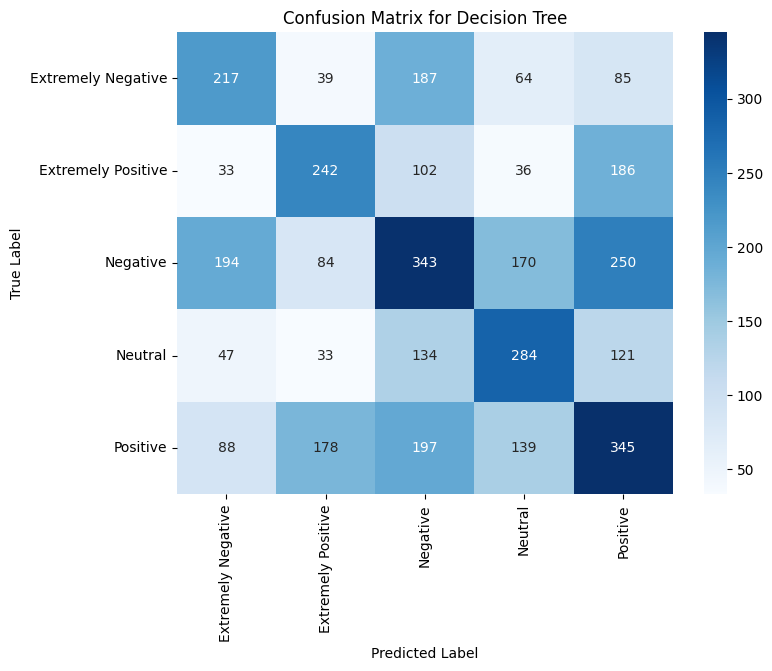

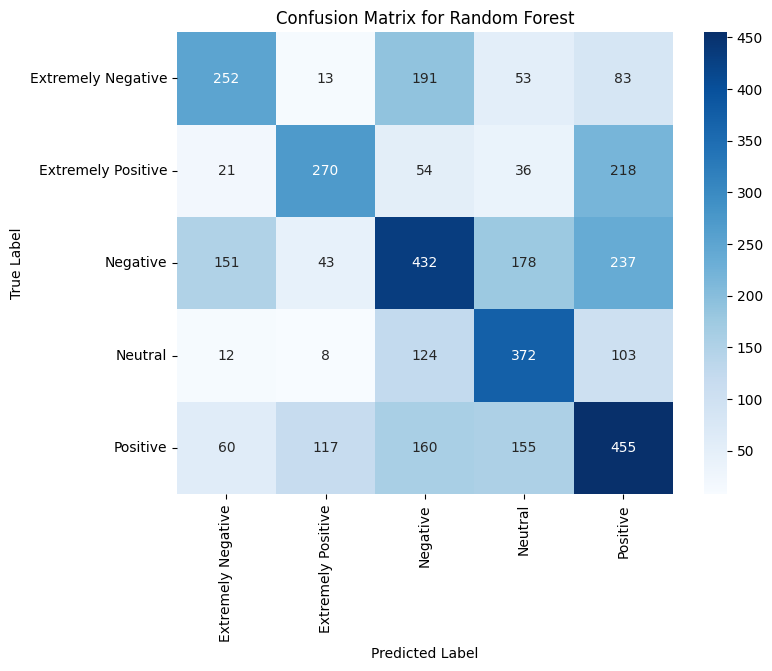

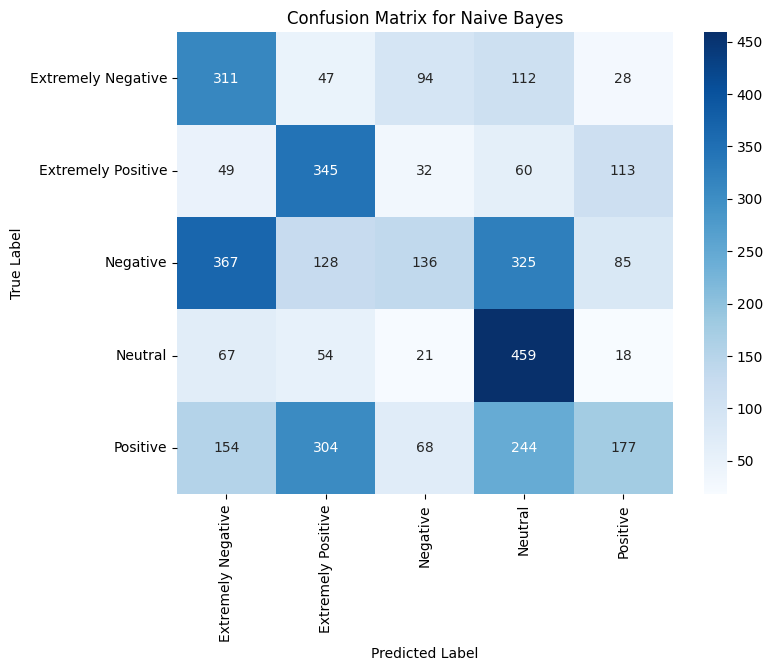

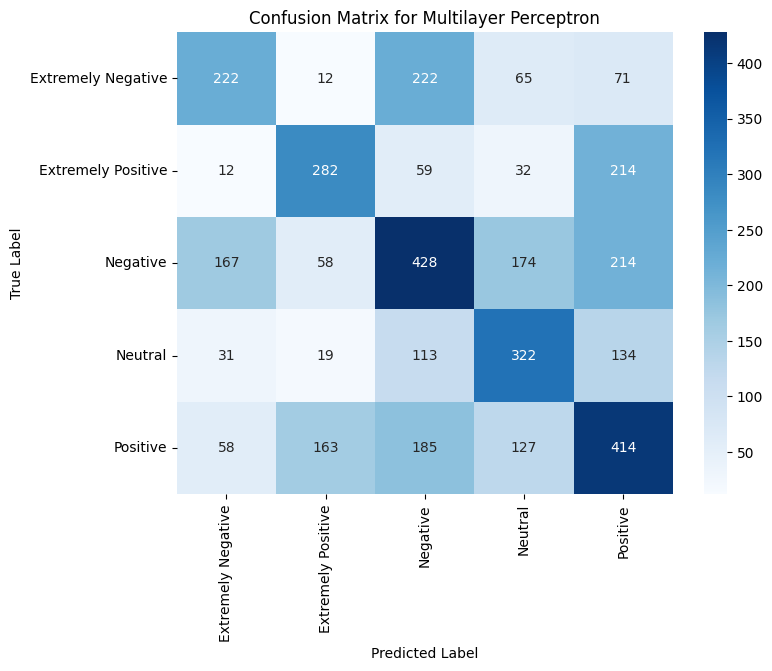

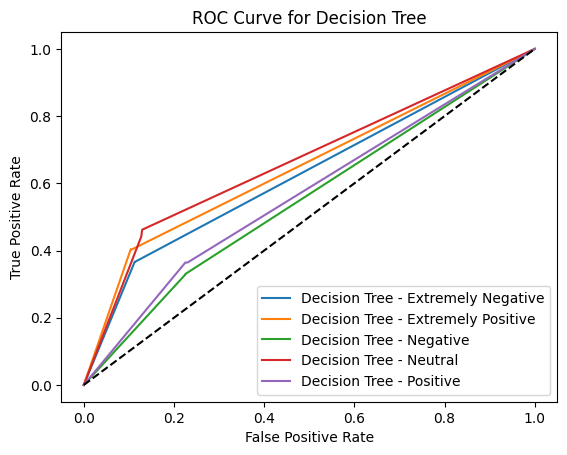

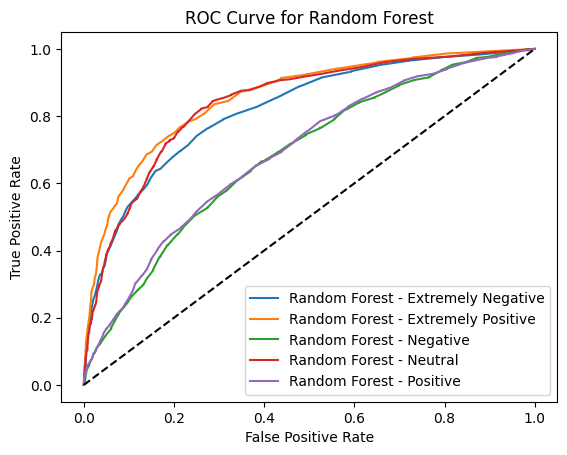

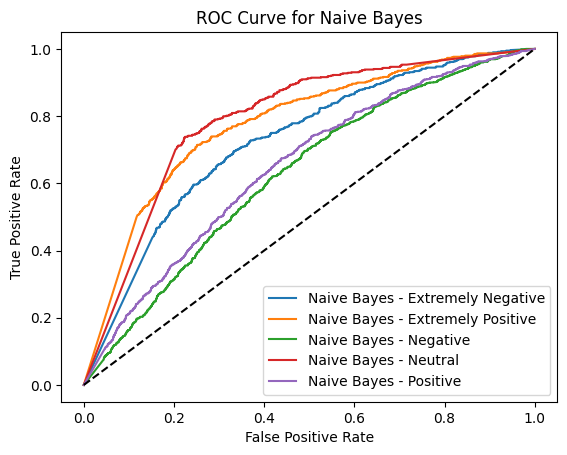

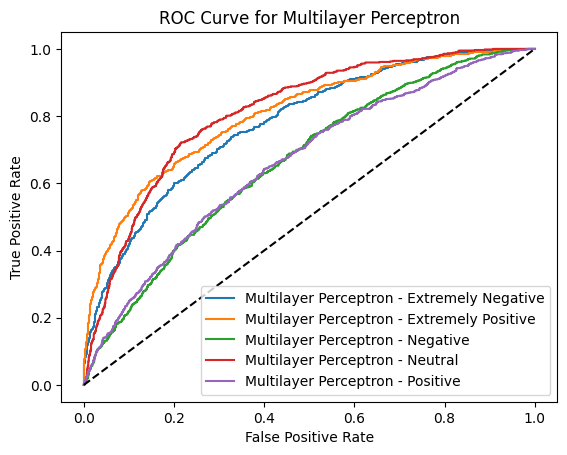

In [4]:
# Import necessary libraries for visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import numpy as np

# Load train and test datasets
train = pd.read_csv('/content/Corona_NLP_train.csv', encoding='ISO-8859-1')
test = pd.read_csv('/content/Corona_NLP_test.csv', encoding='ISO-8859-1')

# Display the first few rows of the train dataset
print("Training Data:")
print(train.head())

# Select features and target
X_train_text = train['OriginalTweet']  # The tweet text to be used as a feature
y_train = train['Sentiment']           # Target variable - sentiment

X_test_text = test['OriginalTweet']    # The tweet text for testing
y_test = test['Sentiment']             # Target variable for testing

# Convert text to numerical feature vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train = vectorizer.fit_transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Multilayer Perceptron': MLPClassifier(random_state=42, max_iter=300)
}

# Dictionary to store predictions and performance metrics
model_metrics = {}
model_predictions = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Store the predictions for visualization
    model_predictions[name] = predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    model_metrics[name] = [accuracy, precision, recall, f1]

    # Print classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, predictions))

# Convert metrics to DataFrame for visualization
metrics_df = pd.DataFrame(model_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Plotting the metrics comparison
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Performance Comparison of Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Visualize confusion matrix for each model
for name, predictions in model_predictions.items():
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Visualizing ROC Curve and AUC for each model (for binary classification or multiclass with one-vs-rest)
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_test_bin = pd.get_dummies(y_test)  # Convert to binary for ROC-AUC calculation
        y_proba = model.predict_proba(X_test)

        for i, label in enumerate(y_test_bin.columns):
            fpr, tpr, _ = roc_curve(y_test_bin.iloc[:, i], y_proba[:, i])
            plt.plot(fpr, tpr, label=f'{name} - {label}')

        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()
